## The Data Overview :

This dataset contains anonymized information about customer subscriptions and their interaction with the service. The data includes various features such as subscription type, payment method, viewing preferences, customer support interactions, and other relevant attributes. It consists of three files such as "test.csv", "train.csv", "data_descriptions.csv".

In [296]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [297]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('train.csv')

In [298]:
data.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [299]:
data.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

Note: `dtypes` is a property of `DataFrame` because it directly exposes the metadata of the object rather than performing any operation or requiring input like a function would.

In [300]:
data.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object

The code lists out different types of columns, Numerical, Categorical, Numerical coulumns with less that 10 unique values, High cardinality categorical variables.

In [303]:
# Grab Variables
def grab_variable(dataframe, num_th=10, car_th=20, var_name=False):
    
    # Categoric Variables #
    
    cat_var = [i for i in dataframe.columns if dataframe[i].dtypes in ["object", "category", "bool"]]
    
    num_but_cat = [i for i in dataframe.columns if dataframe[i].dtypes in ["int64", "float64"]
                   and dataframe[i].nunique() <= num_th]
    
    cat_but_car = [i for i in dataframe.columns if dataframe[i].dtypes in ["category", "object"]
                   and dataframe[i].nunique() > car_th]
    
    cat_var = cat_var + num_but_cat
    cat_var = [i for i in cat_var if i not in cat_but_car]

    # Numeric Variables #
    num_var = [i for i in dataframe.columns if dataframe[i].dtypes in ["int64", "float64"]
               and dataframe[i].nunique() > num_th]

    print("Observation:", len(dataframe))
    print("Number of Variables:", len(dataframe.columns))
    print("Number of Categoric Variables:", len(cat_var))
    print("Number of Num but Cat Variables:", len(num_but_cat))
    print("Number of Cat but Cardinal Variables:", len(cat_but_car))
    print("Number of Numeric Variables:", len(num_var))

    if var_name:
        print("Categoric Variables:", cat_var)
        print("Numeric But Categoric Variables:", num_but_cat)
        print("Categoric But Cardinal Variables:", cat_but_car)
        print("Numeric Variables:", num_var)
    return cat_var, num_but_cat,cat_but_car, num_var

cat_var, num_but_cat,cat_but_car, num_var = grab_variable(data)

Observation: 243787
Number of Variables: 21
Number of Categoric Variables: 12
Number of Num but Cat Variables: 2
Number of Cat but Cardinal Variables: 1
Number of Numeric Variables: 8


In [304]:
print("Categorical",cat_var)
print("Numerical but Categorical",num_but_cat)
print("Cardinality Iusses",cat_but_car)
print("Numerical",num_var)


Categorical ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'SupportTicketsPerMonth', 'Churn']
Numerical but Categorical ['SupportTicketsPerMonth', 'Churn']
Cardinality Iusses ['CustomerID']
Numerical ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'WatchlistSize']


Understanding the **cardinality** of categorical variables is crucial because it directly influences how these features are handled during preprocessing and model training. High cardinality means a categorical feature has many unique values. In this case it's customer ID and we an drop that variable.


Dropping high cardinality column 

In [305]:
print(cat_but_car)
data=data.drop(columns=['CustomerID'])

['CustomerID']


##### We can see that the rest of the variables has low cardinality and can be one hot encoded.

In [307]:
def describe_object(df):
    for col in df.select_dtypes(include = ['object']).columns:
        print(f"For {col} : ", df[col].unique())

describe_object(data)

For SubscriptionType :  ['Premium' 'Basic' 'Standard']
For PaymentMethod :  ['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
For PaperlessBilling :  ['No' 'Yes']
For ContentType :  ['Both' 'Movies' 'TV Shows']
For MultiDeviceAccess :  ['No' 'Yes']
For DeviceRegistered :  ['Mobile' 'Tablet' 'Computer' 'TV']
For GenrePreference :  ['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']
For Gender :  ['Male' 'Female']
For ParentalControl :  ['No' 'Yes']
For SubtitlesEnabled :  ['No' 'Yes']


In [308]:
# Finding Thresholds (Limits)
def outlier_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    q1 = dataframe[variable].quantile(q1)
    q3 = dataframe[variable].quantile(q3)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit


def check_outlier(dataframe, variable):
    lower_limit, upper_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < lower_limit) | (dataframe[variable] > upper_limit)].shape[0] > 0:
        print(variable, "-->", len(dataframe[(dataframe[variable] < lower_limit) | (dataframe[variable] > upper_limit)]))
        return True
    else:
        return False
        
for i in num_var:
    print(i, ":", check_outlier(data, i))

AccountAge : False
MonthlyCharges : False
TotalCharges --> 741
TotalCharges : True
ViewingHoursPerWeek : False
AverageViewingDuration : False
ContentDownloadsPerMonth : False
UserRating : False
WatchlistSize : False


### Refresher on Anomalies

Local Outlier Factor (LOF) and Isolation Forest are both algorithms for anomaly detection, but they are fundamentally different in their approach and use cases. Here’s how they compare:

| **Aspect**                  | **Local Outlier Factor (LOF)**                                                    | **Isolation Forest**                                                     |
|-----------------------------|----------------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Core Concept**            | Measures the local density of data points relative to their neighbors.           | Isolates anomalies based on random partitions of data using decision trees. |
| **Output**                  | Provides an outlier score for each data point (higher scores = greater likelihood of being an outlier). | Classifies each point as an outlier (`-1`) or normal (`1`), based on its isolation score. |
| **Local vs Global Detection**| Focuses on **local anomalies**, comparing a point’s density to its neighbors.    | Detects **global anomalies**, identifying points isolated in the dataset overall. |
| **Dimensionality Handling** | Can struggle with high-dimensional data, as density estimation becomes less reliable. | Handles high-dimensional data well due to its tree-based structure.       |
| **Neighbor Dependency**     | Requires specifying `n_neighbors` to define the local area for density comparison. | Not dependent on neighbors—works based on splitting data.                |
| **Parameters**              | Key parameters: `n_neighbors` and `contamination`.                               | Key parameters: `n_estimators`, `max_samples`, and `contamination`.       |

### **Choosing Between LOF and Isolation Forest**
- **Use LOF** when:
  - You suspect outliers depend on relationships with neighboring points.
  - The dataset has regions of varying density (e.g., clusters with dense and sparse areas).

- **Use Isolation Forest** when:
  - You're dealing with high-dimensional or large datasets.
  - Outliers are globally distinct, rather than local.

In [310]:
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
import pandas as pd


# Isolation Forest Method
def isolation_forest_outliers(dataframe, variable, contamination=0.001):
    data = dataframe[variable].values.reshape(-1, 1)  # Reshape for Isolation Forest
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    labels = iso_forest.fit_predict(data)
    outlier_indices = list(dataframe.index[labels == -1] )
    outliers = (dataframe[variable][labels == -1])
    lower_limit = dataframe[variable].min()  # Placeholder limits
    upper_limit = dataframe[variable].max()
    return lower_limit, upper_limit, len(outliers), outlier_indices

# Loop through numeric variables and apply all methods
results = []

isolation_result = isolation_forest_outliers(data, 'TotalCharges')

results.append({
        'Variable': 'TotalCharges',
        'IsolationForest_Outliers': isolation_result[2],
        'Outlier Indices' : isolation_result[3]
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

       Variable  IsolationForest_Outliers  \
0  TotalCharges                       184   

                                     Outlier Indices  
0  [627, 941, 2800, 3389, 3746, 6948, 7007, 8865,...  


In [330]:
all_index = list()
for row in results_df['Outlier Indices']:
    all_index.extend(row)


all_outliers = list(set(all_index))  # Ensure unique indices
outlier_rows = data.loc[all_outliers]  # Extract rows by their indices

# Print all outlier rows
print("All Outlier Rows:")
outlier_rows["Calculated_Charge_Flag_wrong"] = (abs(outlier_rows['TotalCharges']-outlier_rows['AccountAge']*outlier_rows['MonthlyCharges'] > 20 )).astype('int')


All Outlier Rows:


The total charges don't ssem to have a problematic different when calculated againt account age multiplied by monthly charges, on that basis we won't be removing any numerical outliers!

In [331]:

outlier_rows[outlier_rows["Calculated_Charge_Flag_wrong"] == 1]

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn,Calculated_Charge_Flag_wrong


In [332]:

print(data['SupportTicketsPerMonth'].describe())

count    243787.000000
mean          4.504186
std           2.872548
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max           9.000000
Name: SupportTicketsPerMonth, dtype: float64


Frequency Table Grouped by Churn:
Churn  SupportTicketsPerMonth
0      0                         21047
       1                         20760
       2                         20756
       3                         20431
       4                         20321
       5                         19614
       6                         19533
       7                         19549
       8                         18925
       9                         18669
1      0                          3245
       1                          3523
       2                          3721
       3                          3929
       4                          4297
       5                          4386
       6                          4763
       7                          5077
       8                          5475
       9                          5766
Name: count, dtype: int64


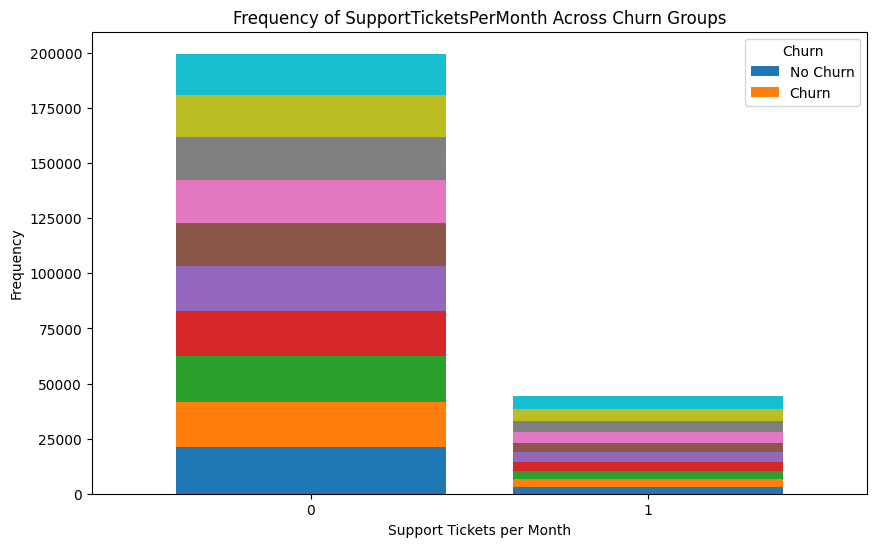

In [340]:
# Frequency Table Grouped by Churn
print("Frequency Table Grouped by Churn:")
frequency_table = data.groupby('Churn')['SupportTicketsPerMonth'].value_counts().sort_index()
print(frequency_table)

# Reshaping the Frequency Table for a Stacked Bar Chart
frequency_table = data.groupby('Churn')['SupportTicketsPerMonth'].value_counts().unstack()

# Plotting the Stacked Bar Chart
frequency_table.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8)
plt.title('Frequency of SupportTicketsPerMonth Across Churn Groups')
plt.xlabel('Support Tickets per Month')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

I don't see a drastic difference in the churn vs no churn with increase in tickets, since the variablility is low, I have decided not to make it categorical.

***********************************************************
                  SubscriptionType      Ratio
SubscriptionType                             
Standard                     81920  33.603104
Basic                        81050  33.246235
Premium                      80817  33.150660


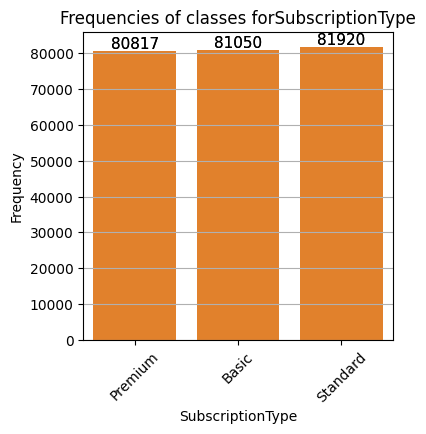

***********************************************************
                  PaymentMethod      Ratio
PaymentMethod                             
Electronic check          61313  25.150234
Credit card               60924  24.990668
Bank transfer             60797  24.938573
Mailed check              60753  24.920525


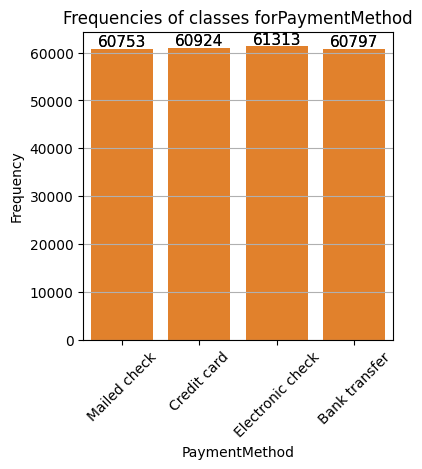

***********************************************************
                  PaperlessBilling      Ratio
PaperlessBilling                             
No                          121980  50.035482
Yes                         121807  49.964518


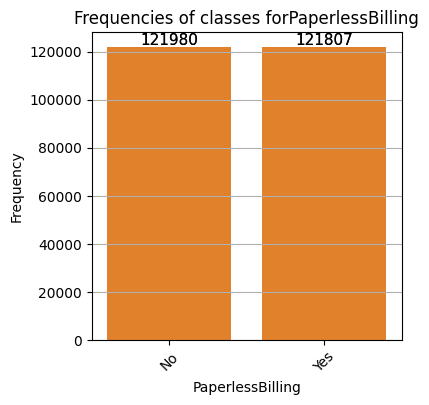

***********************************************************
             ContentType      Ratio
ContentType                        
Both               81737  33.528039
TV Shows           81145  33.285204
Movies             80905  33.186757


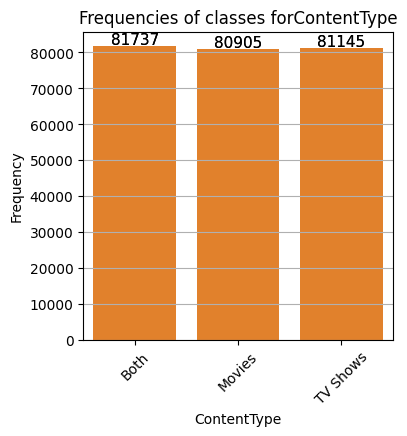

***********************************************************
                   MultiDeviceAccess      Ratio
MultiDeviceAccess                              
No                            122035  50.058042
Yes                           121752  49.941958


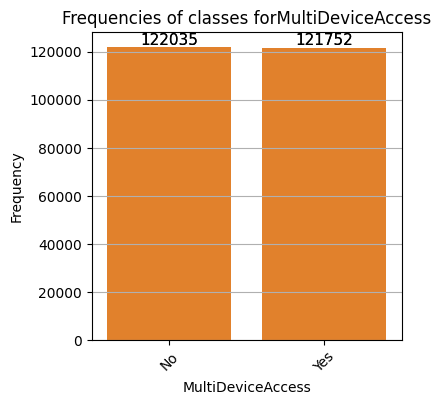

***********************************************************
                  DeviceRegistered      Ratio
DeviceRegistered                             
Computer                     61147  25.082141
Tablet                       61143  25.080501
Mobile                       60914  24.986566
TV                           60583  24.850792


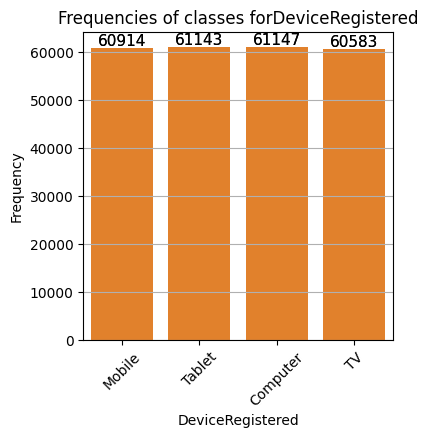

***********************************************************
                 GenrePreference      Ratio
GenrePreference                            
Comedy                     49060  20.124125
Fantasy                    48955  20.081054
Drama                      48744  19.994503
Action                     48690  19.972353
Sci-Fi                     48338  19.827965


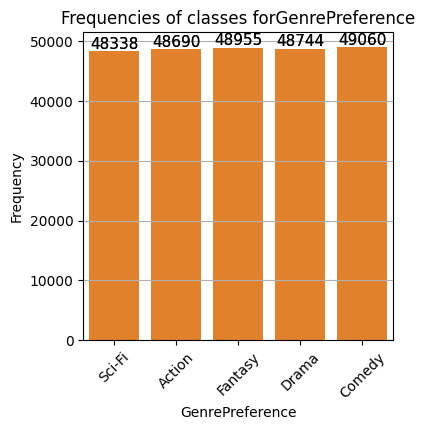

***********************************************************
        Gender      Ratio
Gender                   
Female  121930  50.014972
Male    121857  49.985028


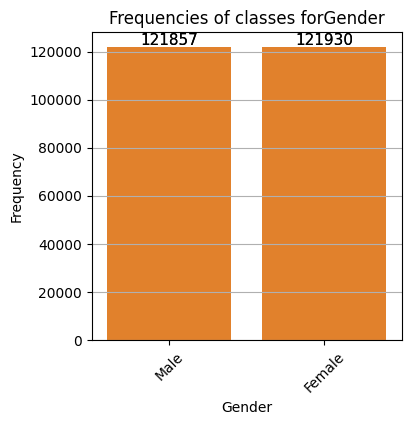

***********************************************************
                 ParentalControl      Ratio
ParentalControl                            
Yes                       122085  50.078552
No                        121702  49.921448


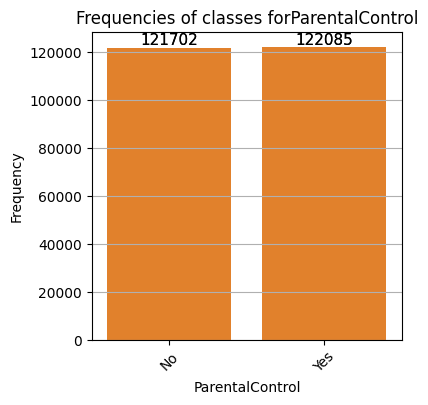

***********************************************************
                  SubtitlesEnabled      Ratio
SubtitlesEnabled                             
Yes                         122180  50.117521
No                          121607  49.882479


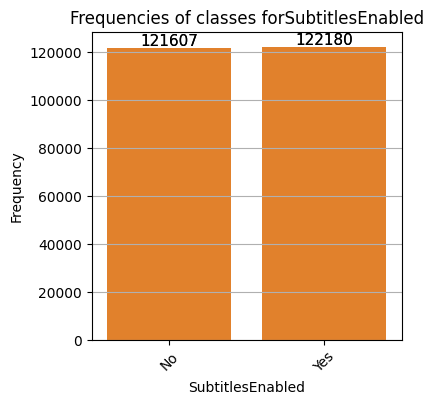

***********************************************************
                        SupportTicketsPerMonth      Ratio
SupportTicketsPerMonth                                   
7                                        24626  10.101441
4                                        24618  10.098159
2                                        24477  10.040322
9                                        24435  10.023094
8                                        24400  10.008737
3                                        24360   9.992329
6                                        24296   9.966077
0                                        24292   9.964436
1                                        24283   9.960744
5                                        24000   9.844659


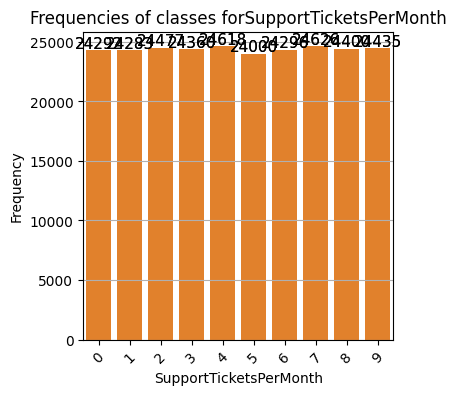

***********************************************************
        Churn      Ratio
Churn                   
0      199605  81.876802
1       44182  18.123198


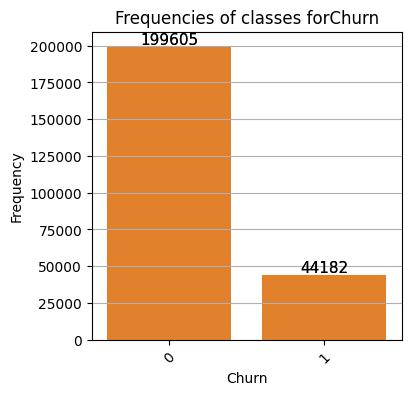

In [219]:
import seaborn as sns
def cat_var_anal(dataframe, cat_cols, plot=False):
    for i in cat_cols:
        print("***********************************************************")
        print(pd.DataFrame({i: dataframe[i].value_counts(),
                            "Ratio": dataframe[i].value_counts() * 100 / len(dataframe)}))

        if plot:

            plt.figure(figsize=(4, 4))
            sns.countplot(data=dataframe, x=i)
            plt.title("Frequencies of classes for" + i)
            plt.xlabel(i)
            plt.ylabel("Frequency")
            plt.xticks(fontsize=10, rotation=45)
            plt.yticks(fontsize=10)
            plt.grid()

            ax = sns.countplot(data=dataframe, x=i)
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=11,
                            color='black', xytext=(0, 5),
                            textcoords='offset points')

            plt.show(block=True)

cat_var_anal(data, cat_var, plot=True)

In [341]:
cat_var

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled',
 'SupportTicketsPerMonth',
 'Churn']

In [ ]:
from scipy.stats import chi2_contingency

# Frequency Table Grouped by Churn
print("Frequency Table Grouped by Churn:")
frequency_table = data.groupby('Churn')['GenrePreference'].value_counts().sort_index()
print(frequency_table)

# Reshaping the Frequency Table for a Stacked Bar Chart
frequency_table = data.groupby('Churn')['GenrePreference'].value_counts().unstack()


# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(frequency_table)


Frequency Table Grouped by Churn:
Churn  GenrePreference
0      Action             40614
       Comedy             39571
       Drama              40033
       Fantasy            40303
       Sci-Fi             39084
1      Action              8076
       Comedy              9489
       Drama               8711
       Fantasy             8652
       Sci-Fi              9254
Name: count, dtype: int64


In [351]:
# Output results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
if p < 0.05:
    print("Significant association between GenrePreference and Churn.")
else:
    print("No significant association between GenrePreference and Churn.")


Chi-Square Statistic: 169.2966532657734
P-Value: 1.4805317432306058e-35
Significant association between GenrePreference and Churn.


##### Note that parent control caused to have lower churn when enabled. So dropping this would not make sense.

In [348]:
# Frequency Table Grouped by Churn
print("Frequency Table Grouped by Churn:")
frequency_table = data.groupby('Churn')['ParentalControl'].value_counts().sort_index()
print(frequency_table)

# Reshaping the Frequency Table for a Stacked Bar Chart
frequency_table = data.groupby('Churn')['ParentalControl'].value_counts().unstack()


Frequency Table Grouped by Churn:
Churn  ParentalControl
0      No                  99386
       Yes                100219
1      No                  22316
       Yes                 21866
Name: count, dtype: int64


Frequency Table Grouped by Churn:
Churn  SubtitlesEnabled
0      No                   98987
       Yes                 100618
1      No                   22620
       Yes                  21562
Name: count, dtype: int64


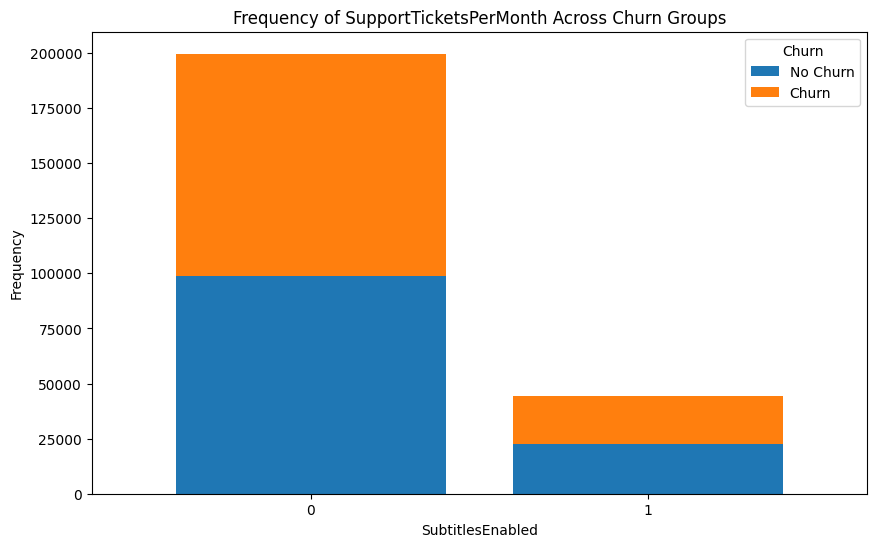

In [ ]:
# Frequency Table Grouped by Churn
print("Frequency Table Grouped by Churn:")
frequency_table = data.groupby('Churn')['SubtitlesEnabled'].value_counts().sort_index()
print(frequency_table)

# Reshaping the Frequency Table for a Stacked Bar Chart
frequency_table = data.groupby('Churn')['SubtitlesEnabled'].value_counts().unstack()

# Plotting the Stacked Bar Chart
frequency_table.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8)
plt.title('Frequency of Subtitled Enabled Across Churn Groups')
plt.xlabel('SubtitlesEnabled')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [346]:
data=data.drop(columns=['SubtitlesEnabled'])

The probability of observing class 0 (i.e., non-churn class) is approximately 82%, while the probability of observing class 1 (i.e., churn class) is approximately 18%. Therefore, our dataset is imbalanced. We should consider this imbalance when building our models later on

                          AccountAge  MonthlyCharges  TotalCharges  \
AccountAge                  1.000000        0.001706      0.820144   
MonthlyCharges              0.001706        1.000000      0.498207   
TotalCharges                0.820144        0.498207      1.000000   
ViewingHoursPerWeek        -0.001640       -0.003029     -0.003006   
AverageViewingDuration      0.000191       -0.000604      0.000860   
ContentDownloadsPerMonth    0.001220       -0.000127      0.000208   
UserRating                  0.000440        0.000056      0.000609   
WatchlistSize              -0.002640       -0.000540     -0.001770   

                          ViewingHoursPerWeek  AverageViewingDuration  \
AccountAge                          -0.001640                0.000191   
MonthlyCharges                      -0.003029               -0.000604   
TotalCharges                        -0.003006                0.000860   
ViewingHoursPerWeek                  1.000000                0.000949   
Aver

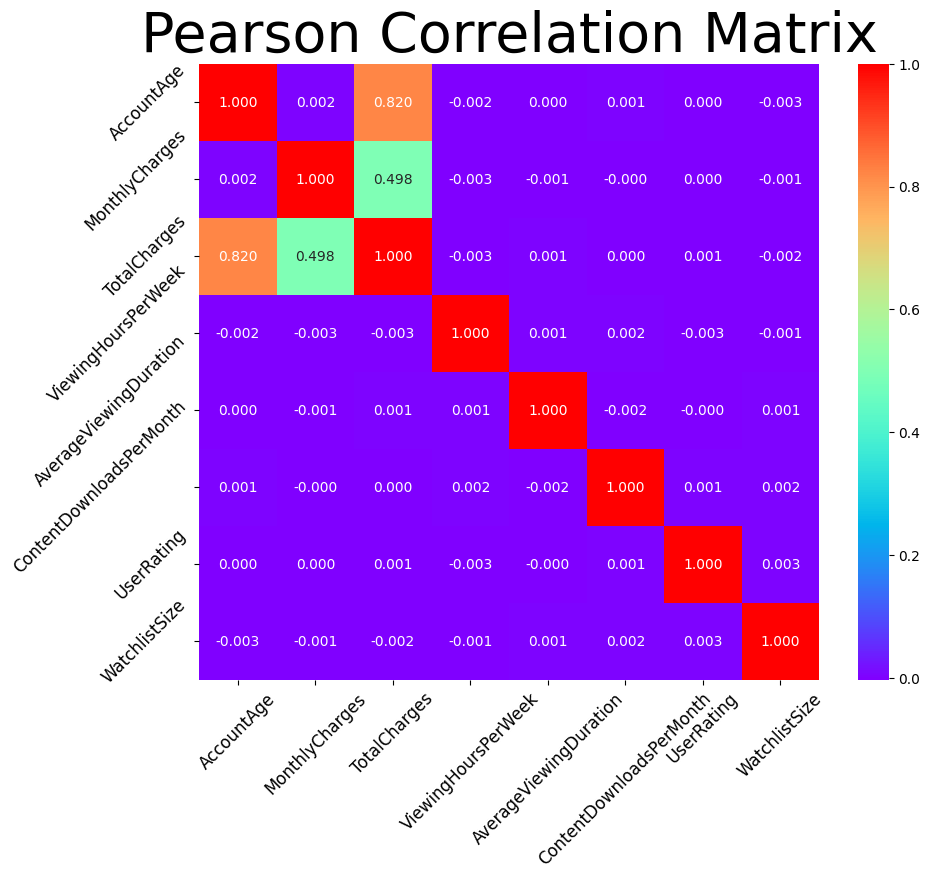

None


In [343]:
# Pearson Correlation Analysis for Numeric Variables
def pearson_corr(dataframe, num_cols, plot=False):
    print(dataframe[num_cols].corr())
    if plot:
        plt.figure(figsize=[10, 8])
        sns.heatmap(data=dataframe[num_cols].corr(), annot=True, fmt=".3f",
                    linecolor="pink", cmap="rainbow")
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(rotation=45, fontsize=12)
        plt.title("Pearson Correlation Matrix", fontsize=40)
        print(plt.show())

pearson_corr(data, num_var, plot=True)

In [ ]:
# Segmentation of AccountAge due to high correlation with total charges
print(data["AccountAge"].describe().T)

count    243787.000000
mean         60.083758
std          34.285143
min           1.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: AccountAge, dtype: float64


In [352]:

labels = ["new_customer", "standard_customer", "old_customer"]
bins = [data["AccountAge"].min() - 1,24, 60,data["AccountAge"].max() + 1]
data["AccountAge_Segment"] = pd.cut(x=data["AccountAge"], bins=bins, labels=labels)

In [353]:
print(data.groupby("AccountAge_Segment").agg({"ViewingHoursPerWeek": "mean",
                                           "AverageViewingDuration": "mean",
                                           "ContentDownloadsPerMonth": ["mean", "count"]}))

                   ViewingHoursPerWeek AverageViewingDuration  \
                                  mean                   mean   
AccountAge_Segment                                              
new_customer                 20.507195              92.483013   
standard_customer            20.532669              92.123164   
old_customer                 20.481571              92.261785   

                   ContentDownloadsPerMonth          
                                       mean   count  
AccountAge_Segment                                   
new_customer                      24.548743   48786  
standard_customer                 24.480652   73856  
old_customer                      24.499236  121145  


C:\Users\nandi\AppData\Local\Temp\ipykernel_21956\2649949174.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby("AccountAge_Segment").agg({"ViewingHoursPerWeek": "mean",


In [358]:
# Segmentation of ViewingHoursPerWeek
print(data["ViewingHoursPerWeek"].describe().T)


count    243787.000000
mean         20.502179
std          11.243753
min           1.000065
25%          10.763953
50%          20.523116
75%          30.219396
max          39.999723
Name: ViewingHoursPerWeek, dtype: float64


In [355]:
labels = ["less_watcher", "watcher", "hard_watcher"]

bins = [data["ViewingHoursPerWeek"].min() - 1,
        data["ViewingHoursPerWeek"].quantile(0.25),
        data["ViewingHoursPerWeek"].quantile(0.75),
        data["ViewingHoursPerWeek"].max() + 1]

data["ViewingHoursPerWeek_Segment"] = pd.cut(x=data["ViewingHoursPerWeek"], bins=bins, labels=labels)


In [356]:
print(data.groupby("ViewingHoursPerWeek_Segment").agg({"ViewingHoursPerWeek": "mean",
                                           "AverageViewingDuration": "mean",
                                           "ContentDownloadsPerMonth": ["mean", "count"]}))

                            ViewingHoursPerWeek AverageViewingDuration  \
                                           mean                   mean   
ViewingHoursPerWeek_Segment                                              
less_watcher                           5.897958              92.000918   
watcher                               20.505635              92.450099   
hard_watcher                          35.099489              92.155133   

                            ContentDownloadsPerMonth          
                                                mean   count  
ViewingHoursPerWeek_Segment                                   
less_watcher                               24.469506   60947  
watcher                                    24.496288  121893  
hard_watcher                               24.551971   60947  


C:\Users\nandi\AppData\Local\Temp\ipykernel_21956\2052835706.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby("ViewingHoursPerWeek_Segment").agg({"ViewingHoursPerWeek": "mean",


#### Testing for changing recall with change in threshold! This excercsie is just to get a custom threshold for model needs, our current model is still not good enough for that.

In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve


In a churn prediction model, **recall** becomes paramount because identifying all potential churners ensures proactive measures to retain them, reducing customer loss. Missing churners (false negatives) means losing valuable opportunities to intervene, potentially damaging revenue and brand loyalty. For example, failing to identify a churn-prone customer prevents offering personalized retention incentives like discounts or tailored support. 

However, **precision** plays a critical role in optimizing resource allocation. Targeting customers inaccurately (false positives) leads to unnecessary expenditure on retention campaigns for individuals who would not churn, inflating costs without added benefit. Striking the right balance is essential—maximizing recall to identify churners while maintaining reasonable precision to avoid wasteful spending. An effective churn model prioritizes recall but refines precision to ensure the retention strategies are both comprehensive and cost-effective, saving money by addressing the true at-risk customer segments.

So here, we would want to prioritize both and look at F1.


The ROC curve plots
sensitivity (recall) versus 1 – specificity.

In [362]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.pipeline import Pipeline  # Pipeline supporting SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

In [233]:
# Creating Child and Adult Classes by ParentalControl and Gender
data.loc[(data["ParentalControl"] == "Yes") & (data["Gender"] == "Male"), "Age_Gender_Segment"] = "Child_Male"
data.loc[(data["ParentalControl"] == "Yes") & (data["Gender"] == "Female"), "Age_Gender_Segment"] = "Child_Female"
data.loc[(data["ParentalControl"] == "No") & (data["Gender"] == "Male"), "Age_Gender_Segment"] = "Adult_Male"
data.loc[(data["ParentalControl"] == "No") & (data["Gender"] == "Female"), "Age_Gender_Segment"] = "Adult_Female"

print(data.groupby("Age_Gender_Segment").agg({"ViewingHoursPerWeek": "mean",
                                           "AverageViewingDuration": "mean",
                                           "ContentDownloadsPerMonth": ["mean", "count"]}))

                   ViewingHoursPerWeek AverageViewingDuration  \
                                  mean                   mean   
Age_Gender_Segment                                              
Adult_Female                 20.568803              92.056005   
Adult_Male                   20.487791              92.484685   
Child_Female                 20.485138              92.296616   
Child_Male                   20.467164              92.218715   

                   ContentDownloadsPerMonth         
                                       mean  count  
Age_Gender_Segment                                  
Adult_Female                      24.556317  60825  
Adult_Male                        24.459878  60877  
Child_Female                      24.525685  61105  
Child_Male                        24.472188  60980  


In [248]:
from scipy.stats import chi2_contingency
import pandas as pd

# Select all categorical (object) variables
categorical_vars = data.select_dtypes(include=['object']).columns.to_list()

# Iterate through each categorical variable and perform Chi-Square Test
for var in categorical_vars:
    contingency_table = pd.crosstab(data[var], data['Churn'])  # Create contingency table
    chi2, p, dof, expected = chi2_contingency(contingency_table)  # Perform Chi-Square test

    

    # Interpret p-value
    if p > 0.05:
        print(f"Result: No significant association between {var} and Churn.\n")
        print(f"Variable: {var}")
        print(f"Chi-Square Statistic: {chi2}")
        print(f"p-value: {p}")

Result: No significant association between PaperlessBilling and Churn.

Variable: PaperlessBilling
Chi-Square Statistic: 0.20277618407801007
p-value: 0.6524892605592605
Result: No significant association between MultiDeviceAccess and Churn.

Variable: MultiDeviceAccess
Chi-Square Statistic: 0.39615487202892075
p-value: 0.5290817523033773
Result: No significant association between DeviceRegistered and Churn.

Variable: DeviceRegistered
Chi-Square Statistic: 2.8391350445894017
p-value: 0.41709804511183635


The RuntimeWarning indicates issues with the numerical tests, specifically "Precision loss due to catastrophic cancellation." This happens when the data for a feature is nearly identical across the two groups (e.g.,  vs ). When data lacks variability, statistical tests such as the T-test or Mann-Whitney U test become unreliable because there's insufficient difference to calculate meaningful results.

In [359]:
y = data['Churn']  # Target variable
# Define the feature columns (all columns except 'Churn')
X = data.drop(columns=['Churn','Gender','ParentalControl','ViewingHoursPerWeek','AccountAge','MonthlyCharges','MultiDeviceAccess'])
#  Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (195029, 14)
X_test shape: (48758, 14)
y_train shape: (195029,)
y_test shape: (48758,)


In [364]:
# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['number']).columns.to_list()
categorical_features = X.select_dtypes(include=['object']).columns.to_list()

# List of ordinal features and their defined order
ordinal_features = ['SubscriptionType']
ordinal_categories = [['Basic', 'Standard', 'Premium']]  # Order defined explicitly

# Separate remaining categorical features
remaining_categorical_features = [col for col in categorical_features if col not in ordinal_features]

# Preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for ordinal categorical features
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(categories=ordinal_categories))
])

# Preprocessing for remaining categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ordinal', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, remaining_categorical_features)
    ]
)

In [365]:
# XGBoost model with class weighting
model = RandomForestClassifier()

In [366]:

# SMOTE Oversampling Step + Pipeline Integration
pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('smote', SMOTE(random_state=42, sampling_strategy='minority')),  # SMOTE step
    ('model', model)                                
])

# Fit the pipeline on the training data
pipeline_XGB.fit(X_train, y_train)

# Predict classes for the test data
y_pred = pipeline_XGB.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predict probabilities for the positive class (class 1)
y_prob = pipeline_XGB.predict_proba(X_test)[:, 1]

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     39968
           1       0.36      0.17      0.23      8790

    accuracy                           0.80     48758
   macro avg       0.60      0.55      0.56     48758
weighted avg       0.75      0.80      0.77     48758

ROC-AUC Score: 0.6636271147179404


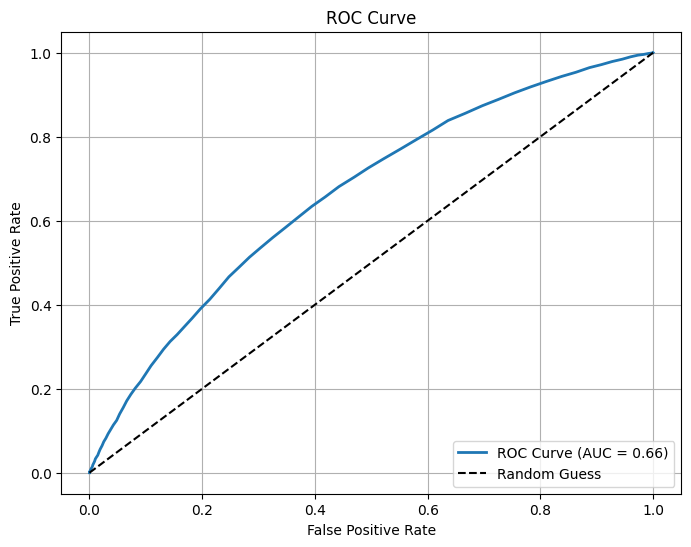

In [371]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [372]:
# Train Set
y_pred_train = pipeline_XGB.predict(X_train)
print(classification_report(y_train, y_pred_train))
y_prob_train = pipeline_XGB.predict_proba(X_train)[:, 1]
print("ROC_AUC-->", roc_auc_score(y_train, y_prob_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    159637
           1       1.00      1.00      1.00     35392

    accuracy                           1.00    195029
   macro avg       1.00      1.00      1.00    195029
weighted avg       1.00      1.00      1.00    195029

ROC_AUC--> 1.0


# Overfitting on training data

In [373]:
pipeline_XGB['model'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [374]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearch
param_grid = {
    'model__max_depth': [18],
    'model__n_estimators' : [ 80]
    
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline_XGB, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

# Evaluate the best model on test data
best_pipeline = grid_search.best_estimator_  # Retrieve the best pipeline
y_pred = best_pipeline.predict(X_test)
y_prob = best_pipeline.predict_proba(X_test)[:, 1]

# Classification report and ROC-AUC
from sklearn.metrics import classification_report, roc_auc_score
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Best Parameters: {'model__max_depth': 18, 'model__n_estimators': 80}
Best ROC-AUC Score: 0.3448700748682669
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     39968
           1       0.31      0.38      0.35      8790

    accuracy                           0.74     48758
   macro avg       0.59      0.60      0.59     48758
weighted avg       0.76      0.74      0.75     48758

ROC-AUC Score: 0.6717161727106372


In [375]:
# Train Set
y_pred_train = best_pipeline.predict(X_train)
print(classification_report(y_train, y_pred_train))
y_prob_train = best_pipeline.predict_proba(X_train)[:, 1]
print("ROC_AUC-->", roc_auc_score(y_train, y_prob_train))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90    159637
           1       0.54      0.70      0.61     35392

    accuracy                           0.84    195029
   macro avg       0.73      0.78      0.75    195029
weighted avg       0.86      0.84      0.84    195029

ROC_AUC--> 0.8947831497904135


In [379]:
!pip install shap

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 23.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ----------------- ---------------------- 5.5/12.6 MB 27.9 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 29.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ------- -------------------------------- 5.8/30.3 MB 29.3 MB/s eta 0:00:01
   ----------------- ---------------------- 13.4/30.3 MB 33.5 MB/s eta 0:00:01
   ---------------------------- ----------- 21.2/30.3 MB 34.4 MB/s eta 0:00:01
   -------------------------------------- - 28.8/30.3 MB 34.5 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 31.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.1.3 which is incompatible.


In [381]:
print(X_train.dtypes)

TotalCharges                    float64
SubscriptionType                 object
PaymentMethod                    object
PaperlessBilling                 object
ContentType                      object
DeviceRegistered                 object
AverageViewingDuration          float64
ContentDownloadsPerMonth          int64
GenrePreference                  object
UserRating                      float64
SupportTicketsPerMonth            int64
WatchlistSize                     int64
AccountAge_Segment             category
ViewingHoursPerWeek_Segment    category
dtype: object


In [ ]:
import shap

best_model = best_pipeline.named_steps['model']  # Extract the XGBoost model
preprocessed_data = best_pipeline.named_steps['preprocessor'].transform(X_train)
X_train_transformed = preprocessed_data
best_model = best_pipeline.named_steps['model']

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(best_model)
# Compute SHAP values using the preprocessed data
shap_values = explainer.shap_values(X_train_transformed)
# Visualize feature importance
shap.summary_plot(shap_values, X_train_transformed)
